# <통계 문제>

## 문제 1
- 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 한다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했다. 그 결과, 표본평균은 495g, 표준편차는 10g으로 나왔다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(즉, 목표 무게를 넘는지 안 넘는지) 5% 유의수준에서 검정해보세요.

In [ ]:
# 단일표본 t검정 문제

import scipy.stats as stats


# 필요한 통계량
sample_mean = 495 # 표본 평균
sample_std = 10 # 표본 표준편차
n = 25 # 표본 크기
mu = 500 # 모집단 평균
alpha = 0.05 # 유의수준


# t검정 통계량 계산
t_statistic = (sample_mean - mu) / (sample_std / (n ** 0.5))


# p-value 설정
p_value = 2 * stats.t.cdf(t_statistic, df = n-1)


# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")

t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


## 문제 2 (분포 시각화)
- 문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을, 기각역을 초록색으로 칠해보세요.
- 기각역: 통계량이 들어왔을 경우, 귀무가설을 기각할 수 있는 영역을 말합니다.
  - <힌트>
    - plt.axvline: y축 평행선 그리기
    - plt.fill_between: 그래프 면적 색칠하기

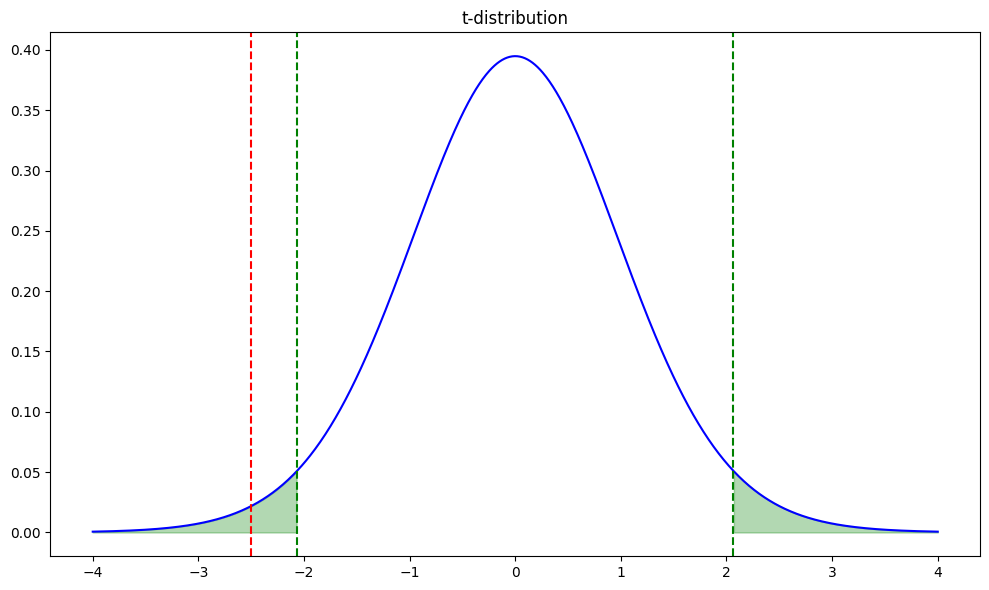

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t


# 1번에서의 통계량 및 계산된 t값
t_statistic = -2.5 # t값
alpha = 0.05 # 유의수준
df = 24 # 자유도


# 임계값 계산
t_critical = t.ppf(1 - alpha/2, df)


# x축과 t분포
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)


# <시각화 하기>
# 1. 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue')

# 2. 기각역 색칠하기
plt.fill_between(x, y, where=(x <= -t_critical), color='green', alpha=0.3)
plt.fill_between(x, y, where=(x >= t_critical), color='green', alpha=0.3)

# 3. 임계값 점선 그리기
plt.axvline(-t_critical, color='green', linestyle='--')
plt.axvline(t_critical, color='green', linestyle='--')

# 4. t통계량 점선 그리기
plt.axvline(t_statistic, color='red', linestyle='--')

# 5. 기타 설정
plt.title('t-distribution')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.show()

## 문제 3 (단일 t표본 검정)
- 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점 입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t검정을 실시하세요.

In [ ]:
# 단일 t표본 검정에서 '단측 검정' 문제

from scipy.stats import ttest_1samp


# 주어진 예시 데이터
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]


# 필요한 통계량
mu = 75 # 모집단 평균
alpha = 0.05 # 유의수준


# 단일 t표본 검정 (양측 검정 결과 반환)
t_stat, p_two_tailed = ttest_1samp(sample_scores, mu)


# 단측 검정 (성적이 향상되었는지 확인)
if t_stat > 0:
  p_value = p_two_tailed / 2
else:
  p_value = 1 - (p_two_tailed / 2)


# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다.")

t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


## 문제 4 (독립 표본 t검정)
- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5%에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t검정을 실시하세요.

In [ ]:
# 독립 표본 t검정 문제

from scipy.stats import ttest_ind, levene


# 그룹 A와 B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]


# 필요한 통계량
alpha = 0.05 # 유의수준


# 등분산 검정
stat_levene, p_levene = levene(group_A, group_B)


# 등분산 여부 판단
  # H0: 등분산 <-> H1: 등분산 아님
equal_var = p_levene > alpha


# 독립 표본 t검정
t_stat, p_value = ttest_ind(group_A, group_B, equal_var = equal_var)


# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다.")

t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


## 문제 5 (대응 표본 t검정)
- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 대응표본 t검정을 실시하세요.
- 또한, 대응표본 t검정에서 등분산 검정이 필요한지 고민해봅시다.

In [ ]:
# 대응표본 t검정에서 등분산 검정은 필요 없다.
# 왜냐면 대응표본 t검정은 2개의 그룹이 동일한 조건의 전/후를 비교하는 것이므로, 분산의 차이를 고려하는 검정이 아니기 때문이다.


# 대응표본 t검정 문제

import numpy as np
from scipy.stats import ttest_rel


# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])


# 필요한 통계량
alpha = 0.05 # 유의수준


# 대응표본 t검정
t_stat, p_value = ttest_rel(before, after)


# 결과 출력 (문제에서 요구한 출력문 그대로 사용)
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 운동 프로그램이 체중 감소에 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 운동 프로그램이 체중 감소에 효과가 없습니다.")

t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 운동 프로그램이 체중 감소에 효과가 있습니다.


## 문제 6 (표본 추출)
- Quest 05-01의 Online Retail || 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질수록 모집단의 평균과 가까워지는지 확인해보세요.

In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np


# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)


# 영국(United Kingdom) 데이터만 필터링
uk_data = retail[retail['Country'] == 'United Kingdom'].copy()


# TotalPrice 계산 (Quantity * Price)
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['Price']


# 모집단 평균 계산
population_mean = uk_data['TotalPrice'].mean()
print(f"Population Mean TotalPrice: {population_mean:.2f}")


# 표본 추출 및 비교
for size in [30, 100, 300]:
    sample = uk_data.sample(n=size, random_state=42)
    sample_mean = sample['TotalPrice'].mean()
    diff = abs(sample_mean - population_mean)
    print(f"Sample size: {size}, Sample Mean: {sample_mean:.2f}, "
          f"Difference from Population Mean: {diff:.2f}")

Path to dataset files: /kaggle/input/online-retail-ii-uci
Population Mean TotalPrice: 16.69
Sample size: 30, Sample Mean: 11.84, Difference from Population Mean: 4.86
Sample size: 100, Sample Mean: 12.79, Difference from Population Mean: 3.90
Sample size: 300, Sample Mean: 15.91, Difference from Population Mean: 0.79


## 📊 문제 6 결과 해석
- 표본의 크기가 커질수록, 모집단의 평균과 가까워 지는 경향이 있다. (random_state=42 지우고 여러번 해봐도 표본이 클수록 모집단의 평균과 가깝게 나온 빈도가 컸음)

## 문제 7 (신뢰구간)
- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰구간을 계산하세요. 또한 표본의 크기가 30, 100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
  - <힌트>
    - stats 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np


# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)


import scipy.stats as stats


# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)  # 표준오차
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval


# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = uk_data.sample(size, random_state=42)
    mean, interval = confidence_interval(sample['TotalPrice'])
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: ({interval[0]:.2f}, {interval[1]:.2f})")


Path to dataset files: /kaggle/input/online-retail-ii-uci
Sample size: 30, Mean: 11.88, 95% CI: (6.38, 17.38)
Sample size: 100, Mean: 16.09, 95% CI: (11.14, 21.03)
Sample size: 300, Mean: 13.34, 95% CI: (11.26, 15.42)


## 📊 문제 7 결과 해석
- 표본의 크기가 커질수록 신뢰구간이 좁아진다. -> 즉, 추정 시 정확도가 높아진다.

## 문제 8 (가설검정 t-test)
- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요.
- 영국과 독일의 분포는 등분산성을 따른다고 가정함.

In [ ]:
from scipy.stats import ttest_ind


# 영국과 독일의 데이터 각각 필터링
uk_data = retail[retail['Country'] == 'United Kingdom'].copy()
germany_data = retail[retail['Country'] == 'Germany'].copy()


# TotalPrice 계산
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['Price']
germany_data['TotalPrice'] = germany_data['Quantity'] * germany_data['Price']


# 독립 표본 t검정 (등분산 가정)
t_stat, p_value = ttest_ind(uk_data['TotalPrice'], germany_data['TotalPrice'], equal_var=True)


# 가설 검정 결과 해석
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


# <A/B 테스트>

- A/B test 스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹페이지(페이지A)가 아닌 새로운 웹페이지(페이지B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지(페이지B)가 기존(페이지A) 대비 효과가 좋은지 확인하기 위해 A/B 테스트를 진행하였습니다.
  - 페이지A: 기존에 운영하던 패키지 판매 웹페이지
  - 페이지B: 새롭게 생성한 패키지 판매 웹페이지
- 두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.

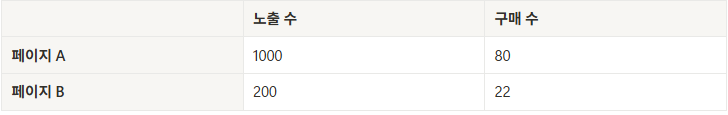

## 문제 9
- 결과를 바탕으로 패키지 기획자는 페이지B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
  - (힌트)
    - https://abtestguide.com/calc/  를 사용하여 해석해보세요

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm


# 데이터 입력
views_A = 1000
conversions_A = 80
views_B = 200
conversions_B = 22


# 전환율 계산
cr_A = conversions_A / views_A
cr_B = conversions_B / views_B
relative_diff = (cr_B - cr_A) / cr_A * 100


# Z-test 실행
z_stat, p_value = proportions_ztest([conversions_A, conversions_B], [views_A, views_B])


# 결과 출력
print("페이지 A 전환율: {:.2f}%".format(cr_A * 100))
print("페이지 B 전환율: {:.2f}%".format(cr_B * 100))
print("전환율 상대적 상승률: {:.2f}%".format(relative_diff))
print("Z 통계량: {:.4f}".format(z_stat))
print("p-value: {:.4f}".format(p_value))
print("해석: {}".format("유의미한 차이 없음 (p > 0.05)" if p_value > 0.05 else "유의미한 차이 있음 (p < 0.05)"))

페이지 A 전환율: 8.00%
페이지 B 전환율: 11.00%
전환율 상대적 상승률: 37.50%
Z 통계량: -1.3888
p-value: 0.1649
해석: 유의미한 차이 없음 (p > 0.05)


<ipython-input-62-f70e838d2028>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Group', y='Conversion Rate', data=ab_summary, ci=False)


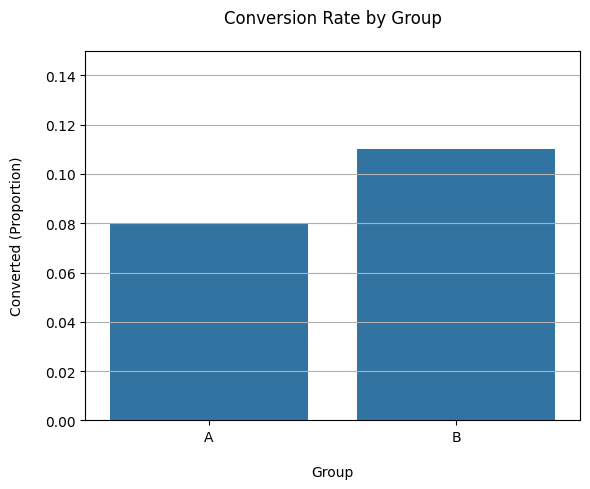

In [ ]:
# 시각화 할 데이터 생성
ab_summary = pd.DataFrame({
    'Group': ['A', 'B'],
    'Conversion Rate': [cr_A, cr_B]
})


# <시각화 하기>
plt.figure(figsize=(6, 5))
sns.barplot(x='Group', y='Conversion Rate', data=ab_summary, ci=False)

plt.ylim(0, 0.15)
plt.title('Conversion Rate by Group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (Proportion)', labelpad=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 📊 문제 9 결과 해석
- 전환율은 증가했지만, 통계적으로 유의하지 않다.
  - 통계 분석 결과, 페이지B가 페이지A보다 전환율이 높아 보이긴 하지만, 그 차이는 통계적으로 유의미하지 않다 (p-*value* > 0.05). 즉, 현재의 데이터만으로는 페이지B가 더 효과적이라고 결론을 내릴 수 없다.
- 또한, 페이지A, 페이지B의 노출 비율이 불균형하게 분배돼서 SRM(표본비율불일치) 경고가 발생했으며, 이는 실험 설계 신뢰도에 영향을 줄 가능성이 있다.
- 따라서, 패키지 기획자는 페이지B의 성능에 대해 확신을 갖기 위해 샘플수를 충분히 확보한 추가 A/B test를 진행할 필요가 있다. 추가로 2개 그룹에 대한 노출 비율을 가급적 1:1로 조정하여 SRM 문제를 방지해야한다.


## 문제 10
- A/B test의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
  - (힌트)
    - A/B 관련 자료를 찾아보세요 (추천 문헌 https://yozm.wishket.com/)

## 📊 문제 10 답변
- A/B test의 결과가 통계적으로 유의하나 효과의 차이 자체가 매우 작다면, 이는 우리가 통계적으로는 차이를 발견했지만 실제로는 그 차이가 현실적으로 중요하지 않을 수 있다는 것을 의미한다. 이 경우에는 추가적인 고려가 필요하다. 처음으로는 결과의 통계적 유의성 외에도 실제적인 비즈니스 영향을 고려해야 한다. 그 차이가 회사의 목표에 미치는 영향이 실질적으로 중요한지를 고려해 보고, 만약 그렇다면 조치를 취할 필요가 있을 것이다. 또한, 이러한 상황에서 실험 설계나 변수 수정 등 추가적인 분석을 통해 결과를 더 깊이 이해하는 것이 중요할 것이다. 실험의 결과가 유의하더라도 효과의 크기가 작을때는 결정을 내리기 전에 신중한 검토가 필요하다!

## <회고>

- 잘한 점
  - 통계 분석에서는, 이제 문제를 보면 대충 어떤 분석에 관한 것인지 파악이 가능했다.
  - 각 그래프를 그릴때, 상세 옵션을 어제보다 능숙하게 할 수 있었다.
  - A/B test에 대한 추가적인 지식을 얻었다.

- 아쉬운 점
  - A/B test를 막상 해석하려하니 약간 어려움이 있었다.
  - 통계는 학부때도 여러번 해서 그래도 익숙한 편이나, A/B test같은 이런 용어에 아직 두려움을 느낌 -> 문제를 보면 당황함 -> 같은 문제를 여러번 보든, 다른 기술 블로그 글을 참고하든, 익숙해 지도록 노력할 필요가 있다.